In [0]:
#!unzip air-pollution-in-seoul.zip

In [150]:
import pandas as pd
import numpy as np
import pickle
from sklearn.externals import joblib 
% matplotlib inline
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
data = pd.read_csv('/content/drive/My Drive/Dataset/Measurement_summary.csv')
data.head(10)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0
5,2017-01-01 05:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.046,0.002,1.1,70.0,61.0
6,2017-01-01 06:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.049,0.002,1.1,66.0,57.0
7,2017-01-01 07:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.045,0.002,1.0,71.0,60.0
8,2017-01-01 08:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.047,0.002,1.1,72.0,60.0
9,2017-01-01 09:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.047,0.002,1.1,74.0,63.0


In [152]:
# Retriving data for station code 105 for NO2
data_105=data[(data['Station code']==105) & (data['NO2']>0)]
print(len(data_105))
print(data_105.head(10))

24739
        Measurement date  Station code  ...  PM10  PM2.5
103610  2017-01-01 00:00           105  ...  81.0   44.0
103611  2017-01-01 01:00           105  ...  67.0   44.0
103612  2017-01-01 02:00           105  ...  84.0   43.0
103613  2017-01-01 03:00           105  ...  85.0   42.0
103614  2017-01-01 04:00           105  ...  79.0   35.0
103615  2017-01-01 05:00           105  ...  72.0   38.0
103616  2017-01-01 06:00           105  ...  70.0   38.0
103617  2017-01-01 07:00           105  ...  76.0   48.0
103618  2017-01-01 08:00           105  ...  87.0   44.0
103619  2017-01-01 09:00           105  ...  80.0   46.0

[10 rows x 11 columns]


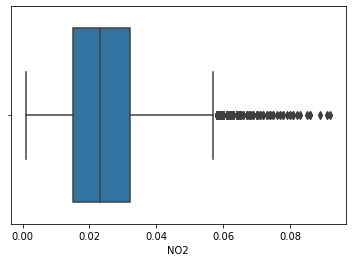

In [153]:
import seaborn as sns
sns.boxplot(data_105['NO2'])

24541


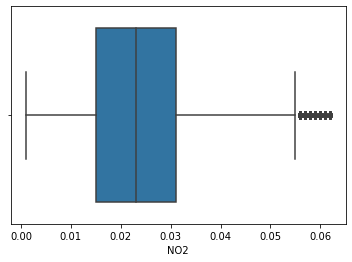

In [154]:
from scipy import stats
z = np.abs(stats.zscore(data_105['NO2']))
threshold = 3
#print(len(np.where(z > 3)))
data_105_Rout = data_105[(z < 3)]
print(len(data_105_Rout))
sns.boxplot(data_105_Rout['NO2'])

In [155]:
df=data_105_Rout['NO2']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)

(24541, 1)


In [156]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))


[0.001] [0.062]
24541
0.0 1.0


In [157]:
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])


24536 [0.7049180327868853, 0.6721311475409836, 0.6557377049180326, 0.6229508196721311, 0.5737704918032787]


In [158]:
matrix=np.matrix(y)
print(matrix.shape)
new_data = pd.DataFrame(matrix,columns=['x1','x2','x3','x4','y'])
new_data.head(10)


(24536, 5)


,x1,x2,x3,x4,y
0,0.704918,0.672131,0.655738,0.622951,0.573770
1,0.672131,0.655738,0.622951,0.573770,0.557377
2,0.655738,0.622951,0.573770,0.557377,0.540984
3,0.622951,0.573770,0.557377,0.540984,0.573770
4,0.573770,0.557377,0.540984,0.573770,0.540984
5,0.557377,0.540984,0.573770,0.540984,0.573770
6,0.540984,0.573770,0.540984,0.573770,0.573770
7,0.573770,0.540984,0.573770,0.573770,0.573770
8,0.540984,0.573770,0.573770,0.573770,0.573770
9,0.573770,0.573770,0.573770,0.573770,0.540984


In [159]:
print(matrix[:,4])

[[0.57377049]
 [0.55737705]
 [0.54098361]
 ...
 [0.37704918]
 [0.24590164]
 [0.47540984]]


In [160]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor_Rout.pkl')
from google.colab import files
files.download('linear_regressor_Rout.pkl')
print(prediction.shape,prediction[0:5])

(8097, 1) [[0.47920293]
 [0.21130464]
 [0.31661834]
 [0.39915762]
 [0.43650657]]


In [161]:
print(model.score(X_train,y_train))
print(model.intercept_)
print(model.coef_)

0.8622670453455858
[0.03028913]
[[ 0.02565814  0.01476143 -0.21692621  1.09810839]]


In [162]:
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

mean squared eror :  0.005747585752038417
absolute mean error :  0.05238276970387308
0.851662191794649


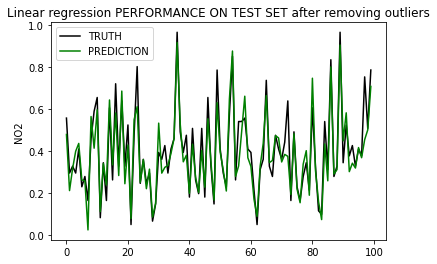

In [163]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET after removing outliers')
plt.ylabel('NO2')
plt.legend()
plt.show()

(24739, 1)
[0.001] [0.092]
24739
0.0 1.0
24734 [0.47252747252747257, 0.45054945054945056, 0.4395604395604395, 0.41758241758241754, 0.38461538461538464]
(8163, 1) [[0.24962513]
 [0.31615767]
 [0.11282945]
 [0.17120677]
 [0.13957308]]
mean squared eror :  0.002573068941379869
absolute mean error :  0.03499237408526037
0.8671148135943243


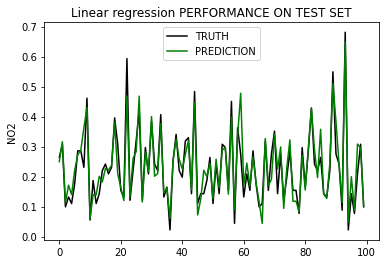

In [164]:
# IMPLEMENTING LINEAR REGRESSION WITHOUT REMOVING OUTLIERS
df=data_105['NO2']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])
matrix= np.matrix(y)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor.pkl')
from google.colab import files
files.download('linear_regressor.pkl')
print(prediction.shape,prediction[0:5])
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET')
plt.ylabel('NO2')
plt.legend()
plt.show()

In [165]:
# BAYESIAN RIDGE REGRESSION
from sklearn import linear_model
from statsmodels.tsa.ar_model import AR
model = linear_model.BayesianRidge()

model.fit(X_train,y_train )
prediction=model.predict(X_test)
joblib.dump(model,'bayesian_regressor.pkl')
from google.colab import files
files.download('bayesian_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))

print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squared eror :  0.002573085182649503
absolute mean error :  0.03499293311253482
0.8671139748200076


In [166]:
# IMLEMENTING  RANDOM FOREST ALGORITHM
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(max_depth=8, random_state=0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'randomforest_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


mean squared eror :  0.0026419405837364985
absolute mean error :  0.03525311870422856
0.8635579632956619


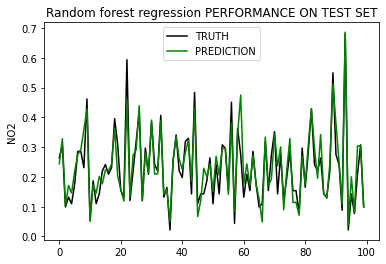

truth :  [[0.26373626]
 [0.30769231]
 [0.0989011 ]
 [0.13186813]
 [0.10989011]
 [0.17582418]
 [0.28571429]
 [0.28571429]
 [0.23076923]
 [0.46153846]]
prediction :  [0.24403645 0.32821246 0.10330963 0.17103529 0.14583182 0.21831386
 0.2750243  0.29130625 0.35888611 0.42863167]


In [167]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Random forest regression PERFORMANCE ON TEST SET')
plt.ylabel('NO2')
plt.legend()
plt.show()
print('truth : ',y_test[0:10])
print('prediction : ',prediction[0:10])

In [168]:
# RIDGE REGRESSION
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'ridge_regressor.pkl')
from google.colab import files
files.download('ridge_regressor.pkl')
print(mean_squared_error(y_test,prediction))
print(mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))


0.0025772059921700605
0.03507691963530474
0.8669011571482869


In [169]:
# IMPLEMENTING SUPPORT VECTOR
from sklearn.svm import LinearSVR
model= LinearSVR()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squared eror :  0.0025997382817432584
absolute mean error :  0.03467833562157313
0.8657374854518436


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


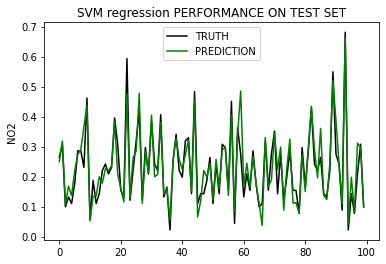

In [170]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('SVM regression PERFORMANCE ON TEST SET')
plt.ylabel('NO2')
plt.legend()
plt.show()

In [171]:
# IMPLEMENTING A NEURAL NETWORK
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='relu'))


model.compile(optimizer = "adam", loss ='mse', 
          metrics =["accuracy"])
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
16571/16571 [==============================] - 1s 70us/step - loss: 0.0032 - accuracy: 0.0024
Epoch 2/100
16571/16571 [==============================] - 1s 67us/step - loss: 0.0027 - accuracy: 0.0024
Epoch 3/100
16571/16571 [==============================] - 1s 66us/step - loss: 0.0027 - accuracy: 0.0024
Epoch 4/100
16571/16571 [==============================] - 1s 66us/step - loss: 0.0026 - accuracy: 0.0024
Epoch 5/100
16571/16571 [==============================] - 1s 64us/step - loss: 0.0026 - accuracy: 0.0024
Epoch 6/100
16571/16571 [==============================] - 1s 63us/step - loss: 0.0026 - accuracy: 0.0024
Epoch 7/100
16571/16571 [==============================] - 1s 63us/step - loss: 0.0026 - accuracy: 0.0024
Epoch 8/100
16571/16571 [==============================] - 1s 66us/step - loss: 0.0026 - accuracy: 0.0024
Epoch 9/100
16571/16571 [==============================] - 1s 64us/step - loss: 0.0027 - accuracy: 0.0024
Epoch 10/100
16571/16571 [====================

dict_keys(['loss', 'accuracy'])


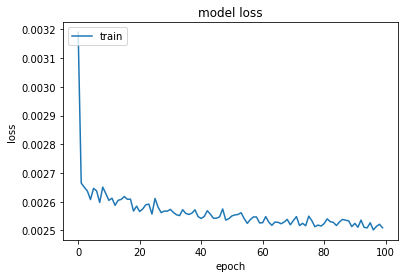

mean squared error :  0.002606699237630876
mean absolute error :  0.03467833562157313
0.8657374854518436


In [172]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
y_pred = model.predict(X_test)
print('mean squared error : ',mean_squared_error(y_test,y_pred))
print('mean absolute error : ',mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
#Converting predictions to label


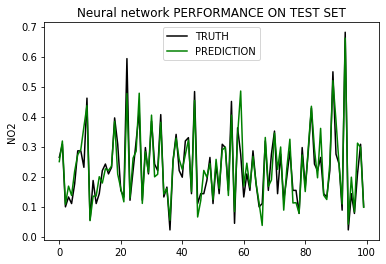

In [173]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Neural network PERFORMANCE ON TEST SET')
plt.ylabel('NO2')
plt.legend()
plt.show()

In [174]:
print(X_train)
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

print(X_train.shape)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
print(X_train.shape)

[[0.23076923 0.18681319 0.20879121 0.27472527]
 [0.14285714 0.10989011 0.12087912 0.15384615]
 [0.15384615 0.15384615 0.15384615 0.15384615]
 ...
 [0.31868132 0.34065934 0.32967033 0.26373626]
 [0.14285714 0.16483516 0.10989011 0.08791209]
 [0.36263736 0.23076923 0.18681319 0.21978022]]
(16571, 4)
(16571, 4, 1)


In [175]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
#regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
16571/16571 [==============================] - 8s 453us/step - loss: 0.0094
Epoch 2/100
16571/16571 [==============================] - 6s 365us/step - loss: 0.0032
Epoch 3/100
16571/16571 [==============================] - 6s 360us/step - loss: 0.0027
Epoch 4/100
16571/16571 [==============================] - 6s 361us/step - loss: 0.0027
Epoch 5/100
16571/16571 [==============================] - 6s 367us/step - loss: 0.0027
Epoch 6/100
16571/16571 [==============================] - 6s 359us/step - loss: 0.0027
Epoch 7/100
16571/16571 [==============================] - 6s 371us/step - loss: 0.0026
Epoch 8/100
16571/16571 [==============================] - 6s 364us/step - loss: 0.0026
Epoch 9/100
16571/16571 [==============================] - 6s 363us/step - loss: 0.0026
Epoch 10/100
16571/16571 [==============================] - 6s 376us/step - loss: 0.0026
Epoch 11/100
16571/16571 [==============================] - 6s 371us/step - loss: 0.0026
Epoch 12/100
16571/16571 [====

dict_keys(['loss'])


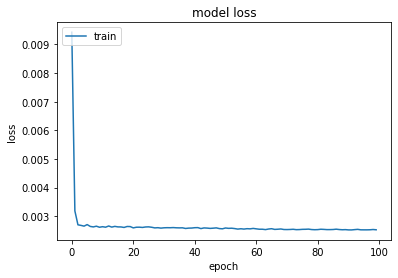

mean square error : 0.002614291681934859
mean absolute error :  0.0352479397489186
0.8649858805235044


In [176]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
prediction = regressor.predict(X_test)
print("mean square error :" ,mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print("mean absolute error : ",mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

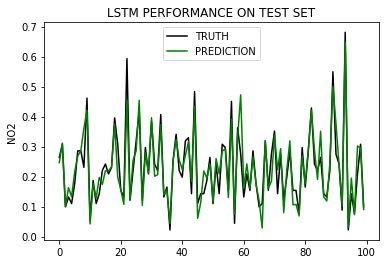

In [177]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('LSTM PERFORMANCE ON TEST SET')
plt.ylabel('NO2')
plt.legend()
plt.show()

In [0]:
#joblib.dump(regressor,'lstm_regressor.pkl')
#from google.colab import files
#files.download('lstm_regressor.pkl')